In [156]:
import pandas as pd
import numpy as np
import pyarrow
from snowflake.connector.pandas_tools import write_pandas, pd_writer
import matplotlib.pyplot as plt
import seaborn as sns
# Causal impact
from causalimpact import CausalImpact

In [123]:
context = get_ctx()

Enter username:  STANISLAV.IVANOV_PROG
Enter password:  ········


Connected succesfully!


In [162]:
q = open('query1.sql', 'r')
sql_stmt = q.read()
# print("SQL: " + sql_stmt)
df = pd.read_sql(sql_stmt, context)

In [163]:
df.columns = ['INSTALL_DATE', 'US', 'CA']
# df.head()
df['INSTALL_DATE'] = pd.to_datetime(df['INSTALL_DATE'])
df.set_index('INSTALL_DATE', inplace=True)
df.head()

,US,CA
INSTALL_DATE,,
2022-09-03,10167,1085
2022-09-04,10875,1110
2022-09-05,11049,1235
2022-09-06,7428,831
2022-09-07,6650,730


The time-series start date is :2022-09-03 00:00:00
The time-series end date is :2023-02-28 00:00:00
The treatment start date is :2023-02-05 00:00:00
Correlation between time series is: 0.8275414670628585


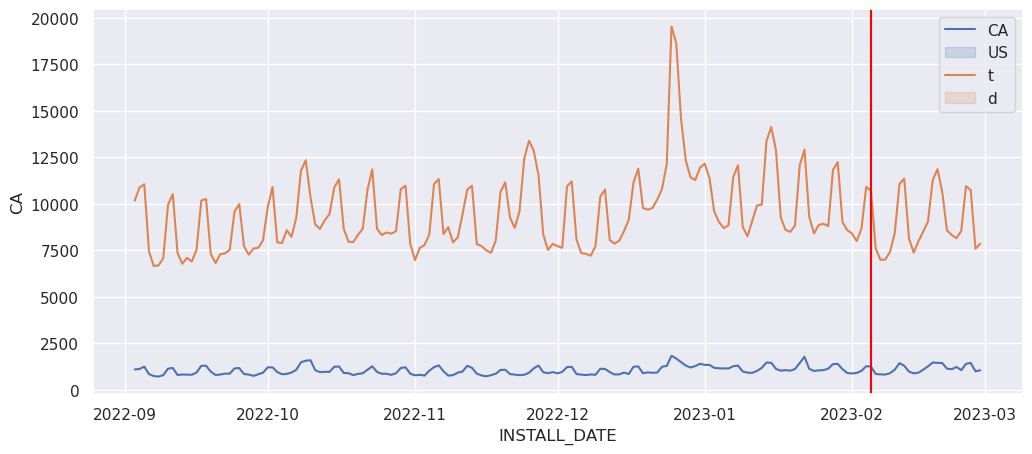

In [164]:
# Print out the time series start date
print(f'The time-series start date is :{df.index.min()}')
# Print out the time series end date
print(f'The time-series end date is :{df.index.max()}')
# Print out the intervention start date
print(f'The treatment start date is :{df.index[155]}')
print(f"Correlation between time series is: {np.corrcoef(df['CA'], df['US'])[0, 1]}")

# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,5)})
# sns.lineplot(x=df.index, y=df['PL'])
sns.lineplot(x=df.index, y=df['CA'])
sns.lineplot(x=df.index, y=df['US'])
plt.axvline(x= df.index[155], color='red')
plt.legend(labels = ['CA', 'US', 't', 'd'])

In [165]:
# Set pre-period
pre_period = [str(df.index.min())[:10], str(df.index[154])[:10]]
# Set post-period
post_period = [str(df.index[155])[:10], str(df.index.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')

The pre-period is ['2022-09-03', '2023-02-04']
The post-period is ['2023-02-05', '2023-02-28']


In [166]:
# Calculate the pre-daily average
pre_daily_avg = df['US'][:155].mean()
# Calculate the post-daily average
post_daily_avg = df['US'][155:].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')

The pre-treatment daily average is 9518.94193548387.
The post-treatment daily average is 8997.5.
The raw difference between the pre and the post treatment is -521.4419354838701.


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


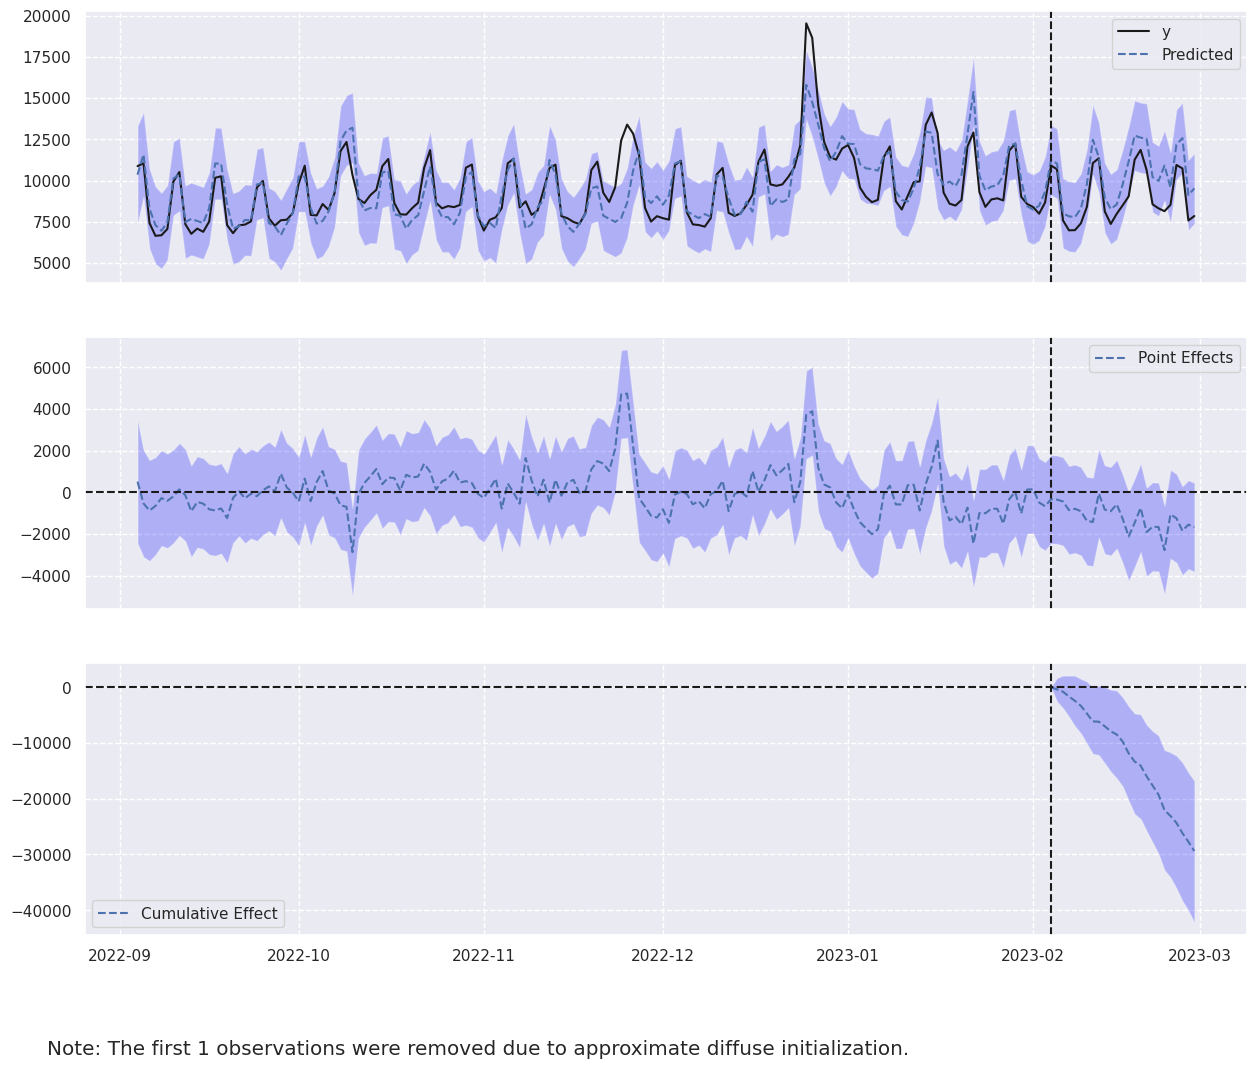

In [167]:
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

In [ ]:
context.close()
print('Logged out')